# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \

**Task Overview:**
- Logistic Regression 

In [1]:
'''
Christopher Santiago
CAP 4610
Dr. Liqiang Wang
HW2
'''

'\nChristopher Santiago\nCAP 4610\nDr. Liqiang Wang\nHW2\n'

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.


In [ ]:
# Import and rename libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 - Data Preparation ##

Prepare the data for regression task. 

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.


![](https://drive.google.com/uc?export=view&id=1CPv5s4W8SkUMa_sXCIz-NejSnFj-e1IH)

In [ ]:
# Preprocess input data and generate plots
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAP 4630/HW2/data_logistic.csv')

def plot_data(df):
  colors = ['#bfbf00', '#000000']
  markers = ['o','+']
  df["color"] = df.apply(lambda x: colors[int(x.label)], axis=1)
  df["markers"] = df.apply(lambda x: markers[int(x.label)], axis=1)

  for marker, d in df.groupby('markers'):
    label = 'Positive' if marker == '+' else 'Negative'
    plt.scatter(x=d['x1'], y=d['x2'], c=d['color'], marker=marker, label=label)
  plt.legend()


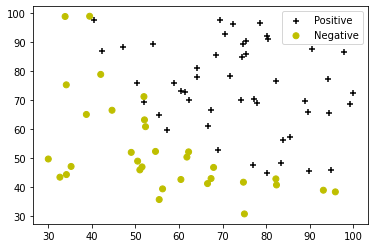

In [ ]:
plot_data(df)
plt.show()

### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. 

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**). 
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X). 

![](https://drive.google.com/uc?export=view&id=18j5oHdw78uVm2WwHsdIb4hwhpXDxR37S)

In [ ]:
# Implement sigmoid fuction here
import math

def sigmoid(z):
  sig = 1 / (1 + math.exp(-z))
  return sig

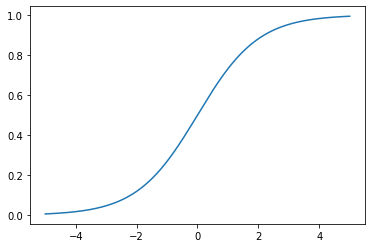

In [ ]:
# Plot data here
X = np.linspace(-5, 5, 1000)
Y = [sigmoid(x) for x in X]

plt.plot(X, Y)
plt.show()

### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. 

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.

![](https://drive.google.com/uc?export=view&id=1xLhlPFI4wekwuA7lFm7ebRVt0XBZk3e7)

2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.

![](https://drive.google.com/uc?export=view&id=1xfA0A0xyRv2L5JZIdedAmEZxZ3DwpOCF)

3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. 


In [ ]:
df = df.drop(['color', 'markers'], axis=1)
X = df.iloc[:,:2]
X['ones'] = 1
ones = X['ones']
X.drop('ones', axis=1 ,inplace=True)
X.insert(0, 'ones', ones)
y = df.iloc[:,2]

In [ ]:
# Implement the cost function here
theta = np.array([0,0,0])

def cal_cost(theta, X, y):
  Z = np.dot(X, theta)
  htheta = np.array([sigmoid(z) for z in Z])
  eps = 1e-15
  term1 = np.dot(np.log(htheta), y)
  term2 = np.dot(np.log(1-htheta+eps), (1-y))
  
  cost = -1 / len(y) * np.sum((term1 + term2))

  return cost

print(cal_cost(theta, X, y))


def cal_grad(theta, X, y):
  Z = np.dot(X, theta)
  htheta = np.array([sigmoid(z) for z in Z])
  term1 = np.dot(np.transpose(X), (htheta-y))
  grad = 1 / len(y) * term1
  
  return grad

print(cal_grad(theta, X, y))

0.6931471805599445
[ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. 

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.


In [ ]:
# Gradient Descent Implementation Here
theta = np.array([0,0,0])

L = 0.001  # learning rate
epochs = 80000

for i in range(epochs):
  
  grad = cal_grad(theta, X, y)
  theta = theta - (L * grad)
  
  cost = cal_cost(theta, X, y)

  if i < 4:
    print(f'Epoch: {i}')
    print(f'Theta: {theta}')
    print(f'Cost: {cost}')

print(f'Theta: {theta}')
print(f'Cost: {cost}')

Epoch: 0
Theta: [0.0001     0.01091242 0.01173653]
Cost: 0.6996118077359638
Epoch: 1
Theta: [-0.0001129   0.00053949  0.00229352]
Cost: 0.6649331468590681
Epoch: 2
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]
Cost: 0.6679914364992459
Epoch: 3
Theta: [-0.0002356   0.0004607   0.00370829]
Cost: 0.6545873034874964
Theta: [-3.88329777  0.02947987  0.03935448]
Cost: 0.43838894881827817


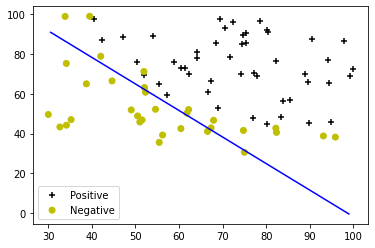

In [ ]:
plot_data(df)

'''
8


You want to plot θTX = 0, where X is the vector containing (1, x1, x2). That is, plot the line defined by theta[0] + theta[1]*x1 + theta[2]*x2 = 0
'''

# Draw Decision Boundary Here
# X1 = X.iloc[:,1]
# X2 = -(theta[0] + theta[1]*X1)/ theta[2]

# Professor switch X2 and X1 components when graphing examples boundary line.

X2 = X.iloc[:,2]
X1 = (-(theta[2]*X2) -theta[0])/theta[1]

plt.plot(X2, X1, c='blue')
plt.show()


### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. 

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


In [ ]:
# Evaluate the model
Z = np.dot(X, theta)
htheta = np.array([sigmoid(z) for z in Z])
prediction = htheta > 0.5
correct = prediction == y
print(f'Model Accuracy: {np.sum(correct) / len(y)}')

Model Accuracy: 0.85


In [ ]:
Z = np.dot([1,56,32], theta)
print(f'Predicted Probability of x1 = 56, x2 = 32 is {Z}')

Predicted Probability of x1 = 56, x2 = 32 is -0.9730820224175794
